In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
#from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('Housing_dataset_train.csv')
test = pd.read_csv('Housing_dataset_test.csv')
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [5]:
sub = pd.read_csv('Sample_submission.csv')
sub.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


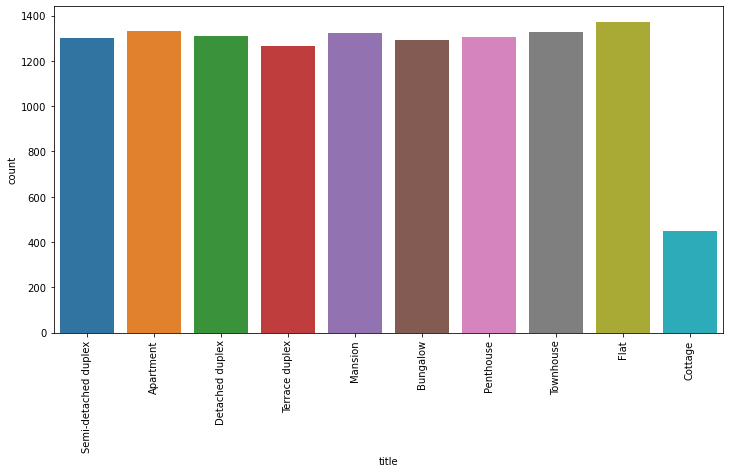

In [6]:
#What is the distribution of house types in the dataset?
plt.figure(figsize=(12,6))
sns.countplot(x='title', data=df)
plt.xticks(rotation=90)
plt.show()

**What is the distribution of house types in the dataset?**

Cottage House types is low compared to others

In [7]:
#Which state has the highest number of houses in the dataset?

df['loc'].value_counts()

Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: loc, dtype: int64

**Which state has the highest number of houses in the dataset?**

Kaduna has the highest number of houses in the dataset


In [8]:
#What is the average house price in each state?

df.groupby('loc').mean()[['price']]

,price
loc,
Abia,1.717083e+06
Adamawa,1.905287e+06
Akwa Ibom,2.725454e+06
Anambra,2.337230e+06
Bauchi,1.772961e+06
Bayelsa,3.112322e+06
Benue,1.920461e+06
Borno,1.735704e+06
Cross River,2.507765e+06


<AxesSubplot:xlabel='bedroom', ylabel='price'>

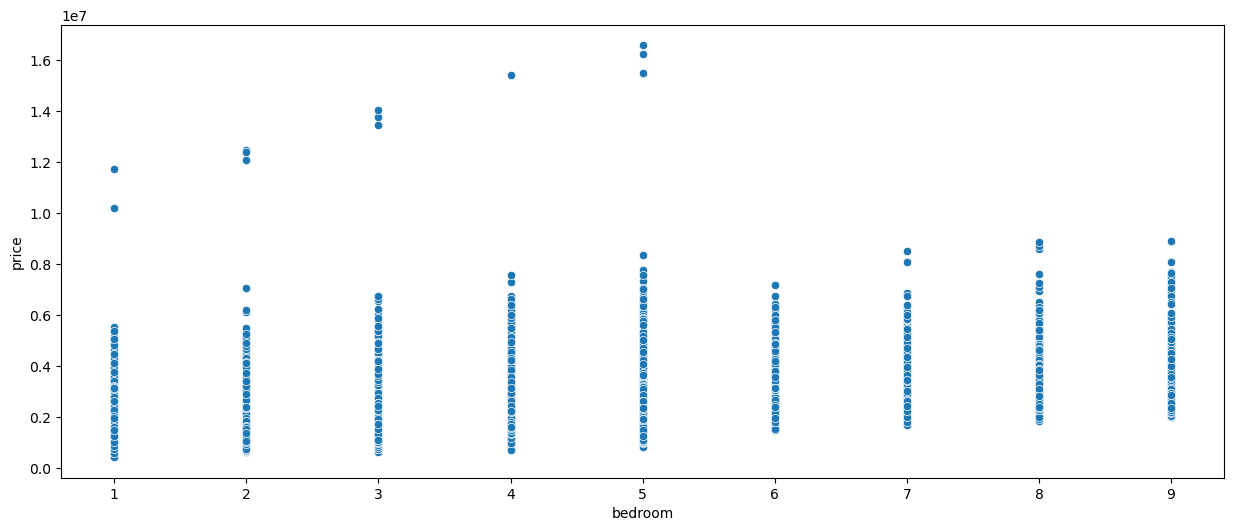

In [13]:
#Is there any relationship between the number of bedrooms and the house price?
plt.figure(figsize=(15,6),dpi=100)
sns.scatterplot(x='bedroom', y='price', data=df)

**Is there any relationship between the number of bedrooms and the house price?**

From the above Plot I can see that houses that have 5 bedrooms have the highest price


<AxesSubplot:xlabel='bathroom', ylabel='price'>

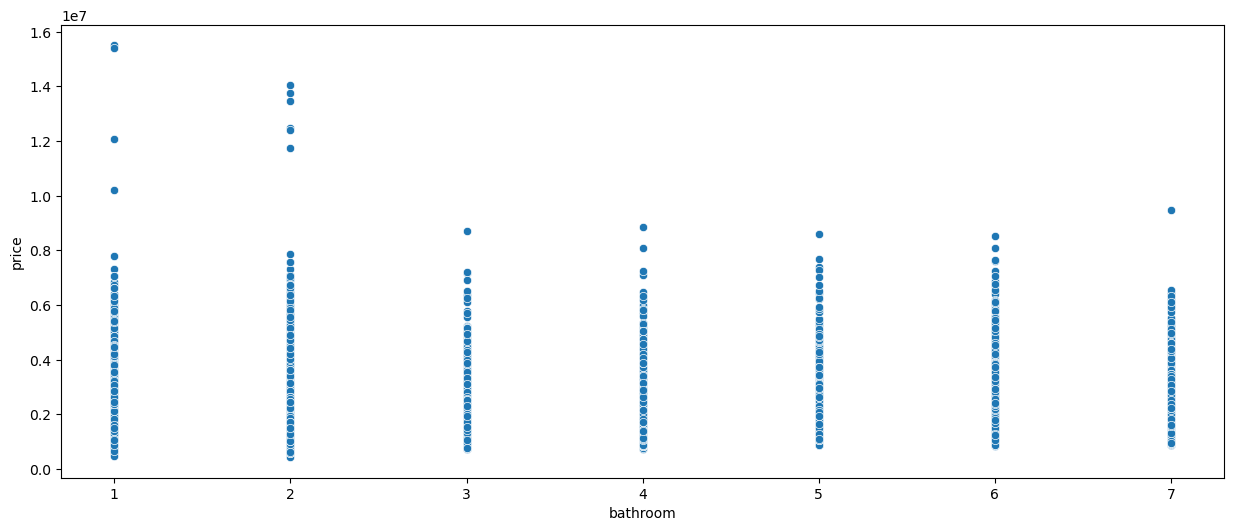

In [20]:
#Is there any relationship between the number of bathrooms and the house price?
plt.figure(figsize=(15,6),dpi=100)
sns.scatterplot(x='bathroom', y='price', data=df)

**Is there any relationship between the number of bathrooms and the house price?**

From the above Plot I can see that houses that have 1 bathroom have the highest price

<AxesSubplot:xlabel='title', ylabel='bathroom'>

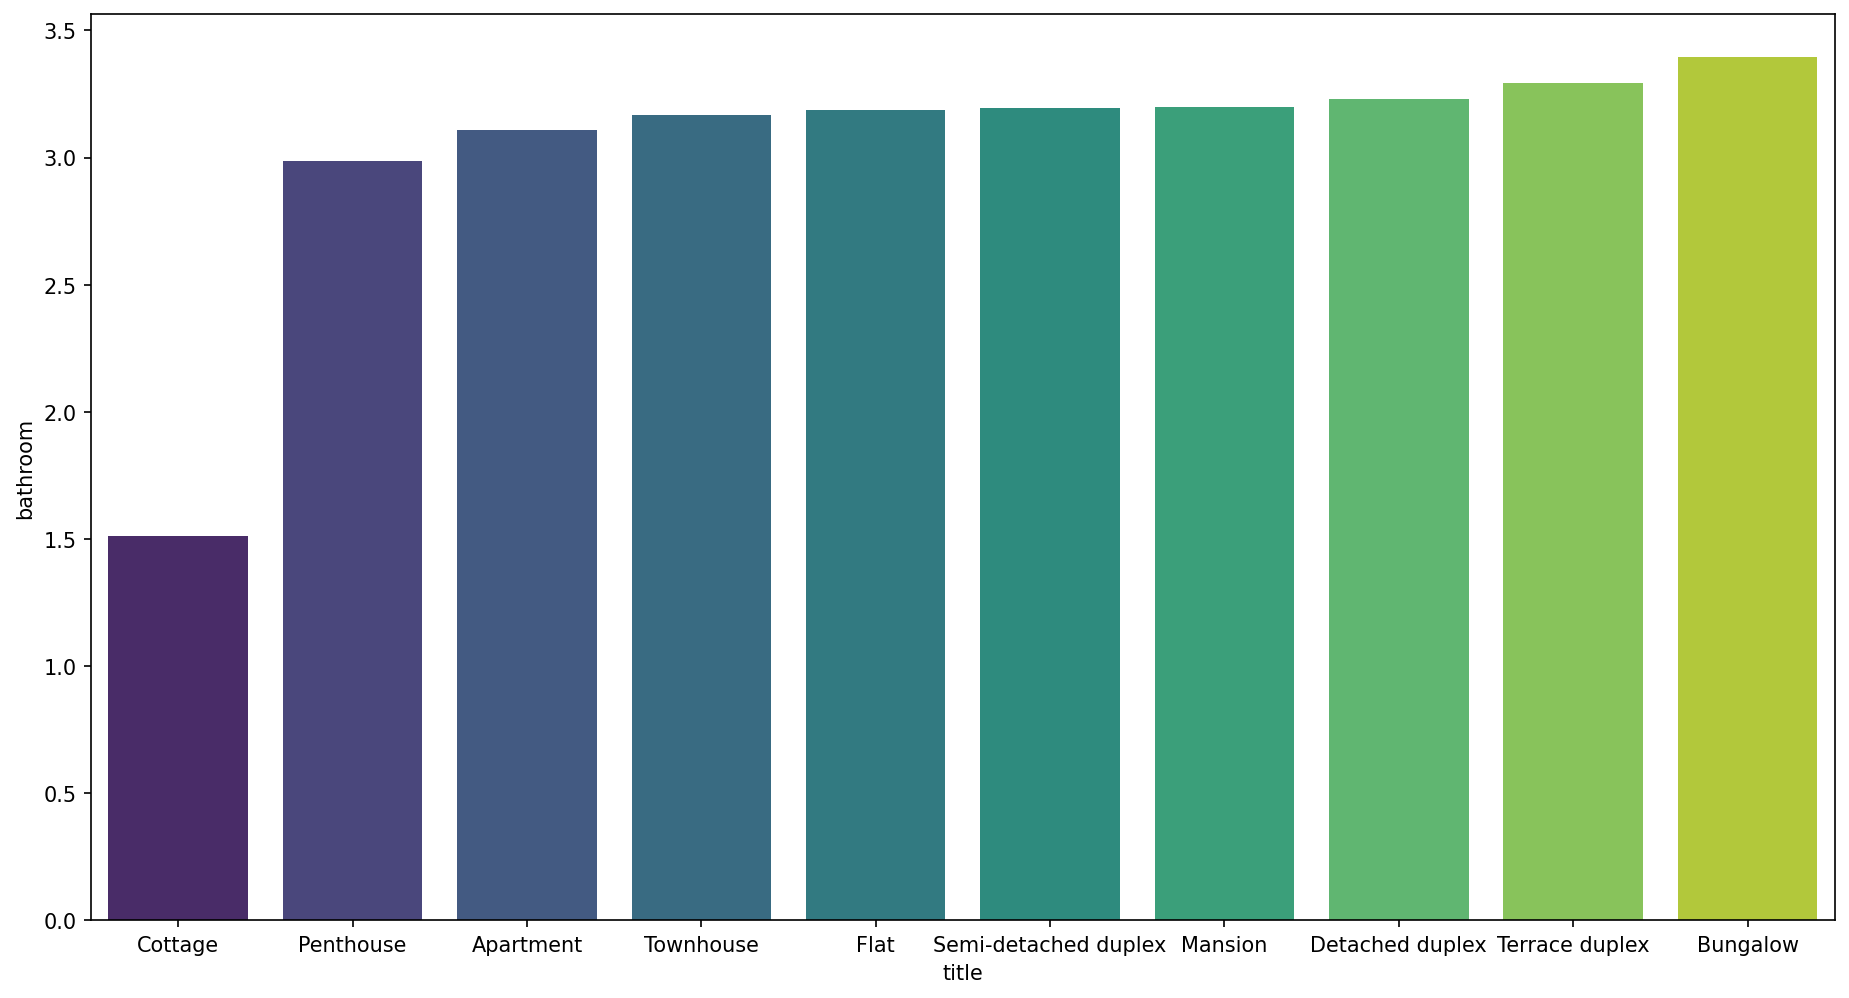

In [19]:
#Which house type has the highest average number of bathrooms?


bat = df.groupby('title').mean()[['bathroom']].sort_values('bathroom').reset_index()
plt.figure(figsize=(15,8),dpi=150)
sns.barplot(x='title', y='bathroom', data=bat, palette='viridis')


**Insight**

Bungalow house type has the highest number of bathroom at an average while cottage house type has the lowest

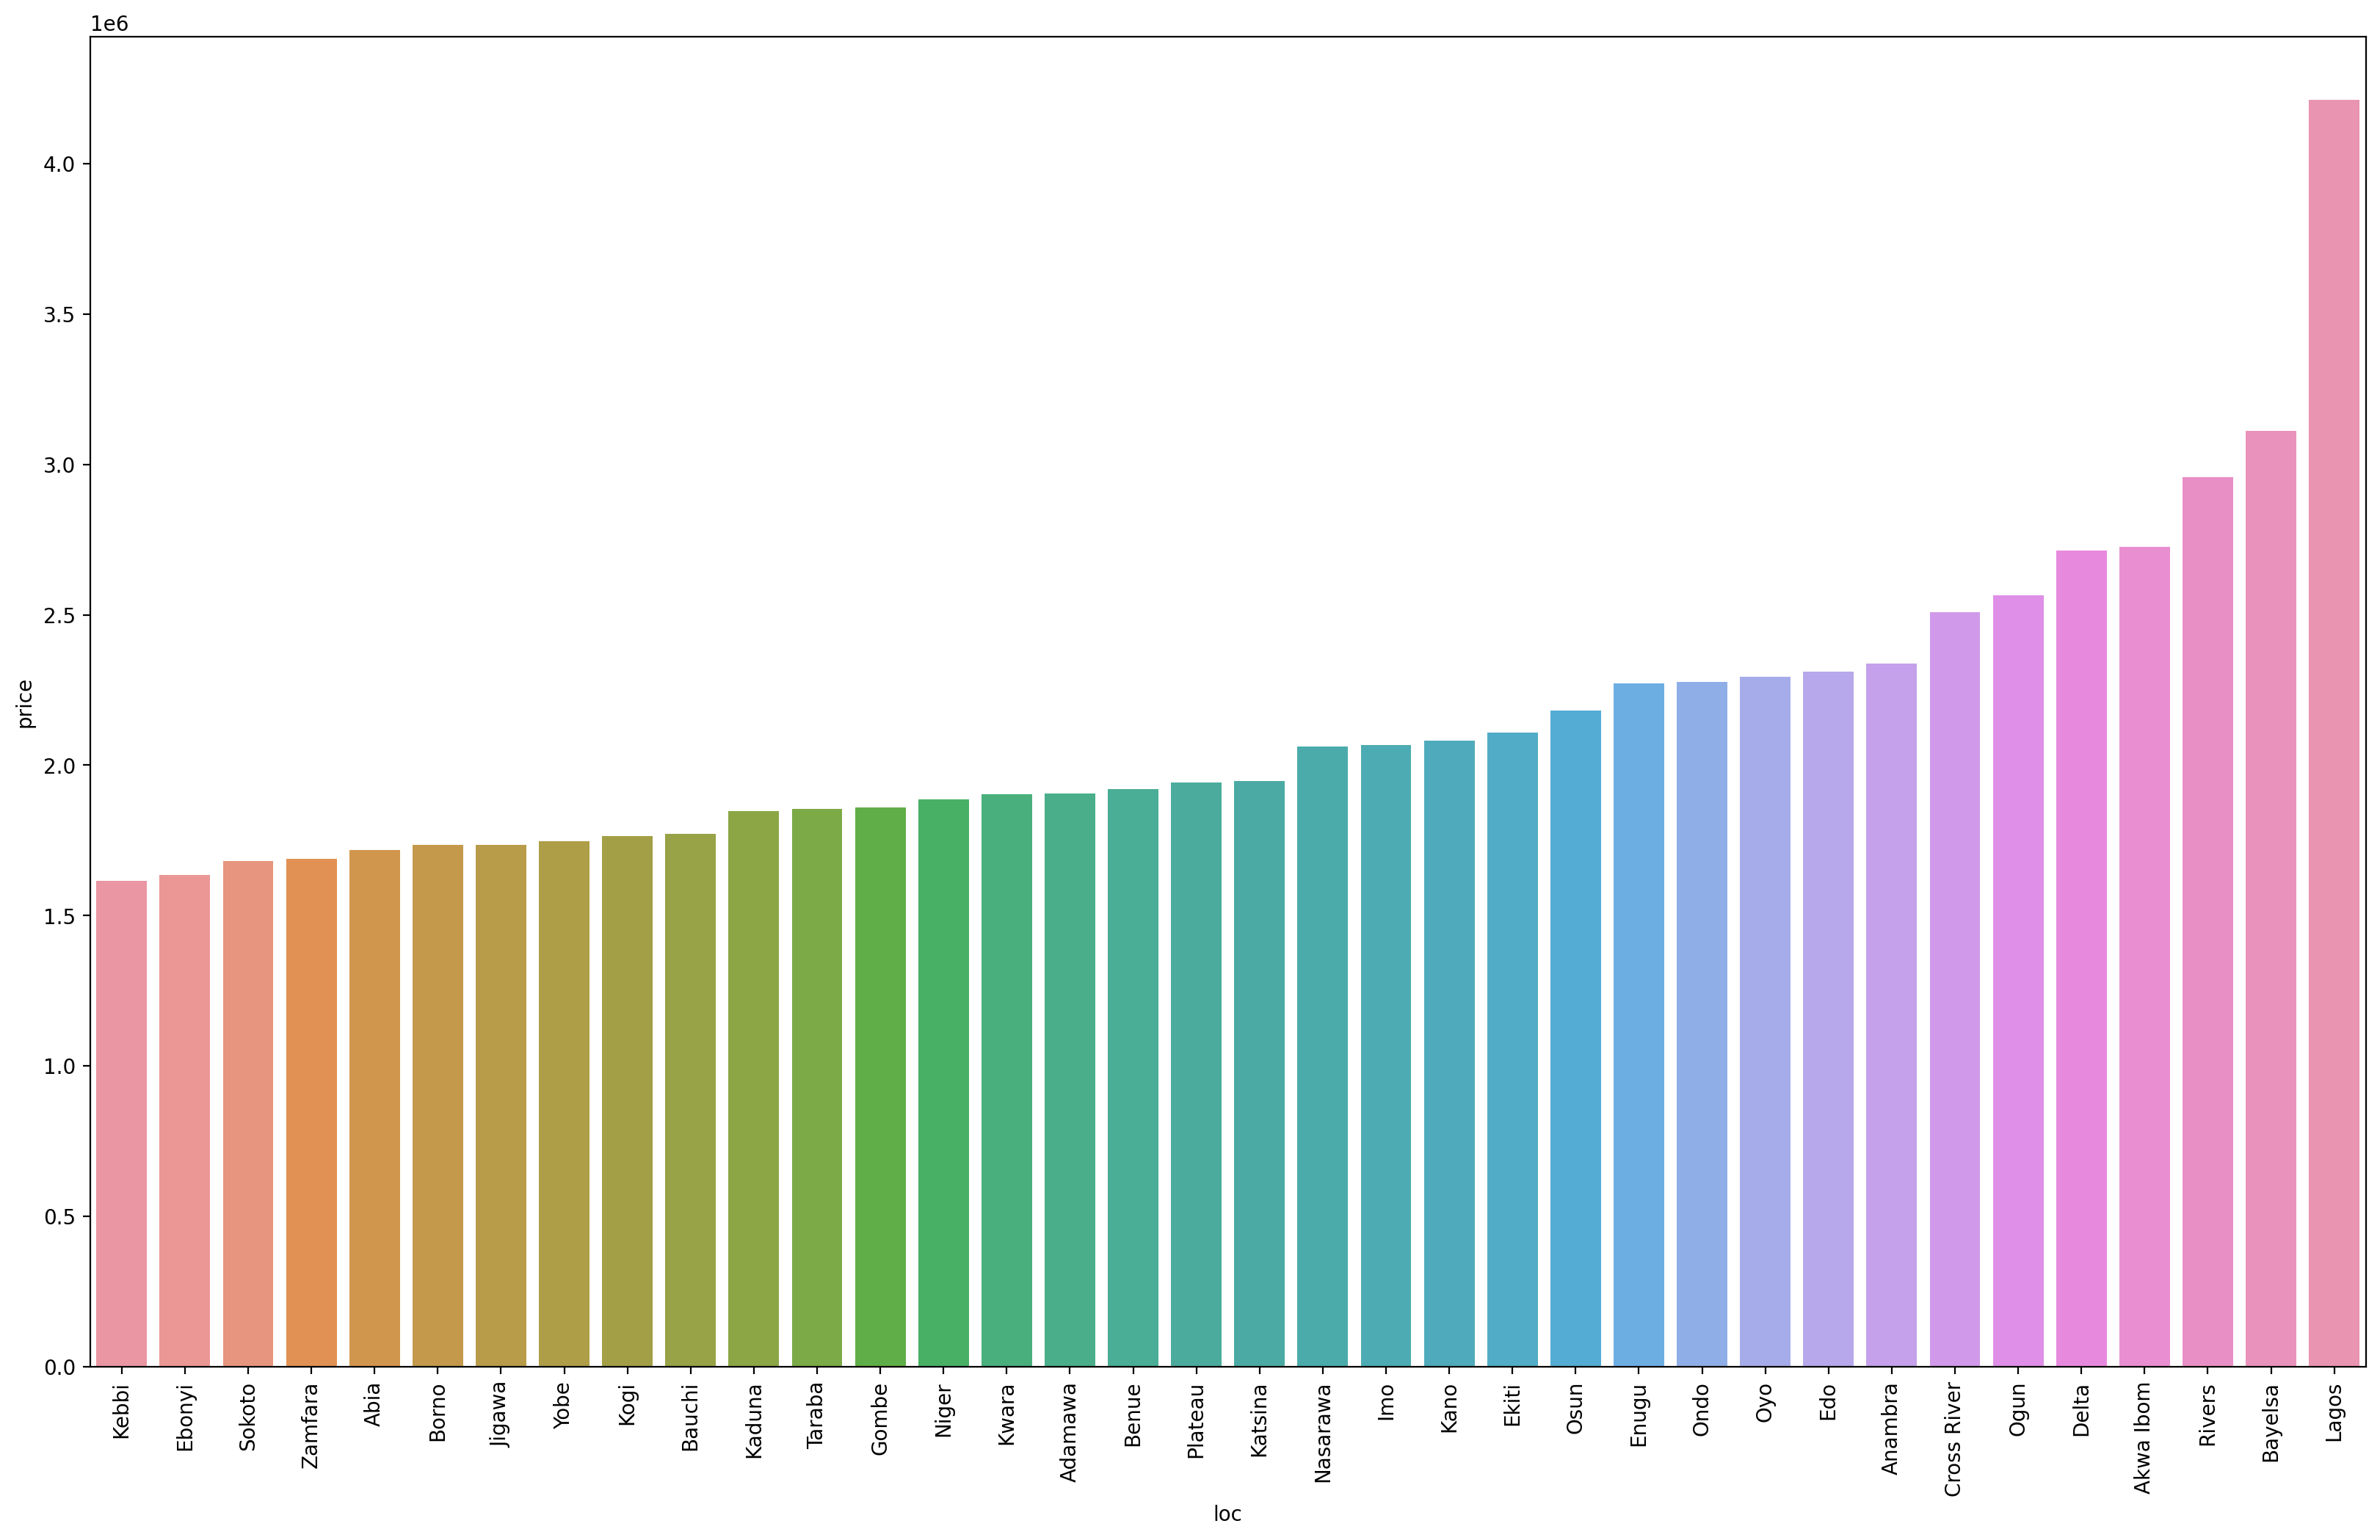

In [27]:
#Is there a significant difference in house prices between different states?
lag = df.groupby('loc').mean()[['price']].sort_values('price').reset_index()
plt.figure(figsize=(20,12),dpi=200)
sns.barplot(x='loc', y='price', data=lag)
plt.xticks(rotation=90);

**Insight**

Lagos State has the highest number of Price

<AxesSubplot:xlabel='title', ylabel='price'>

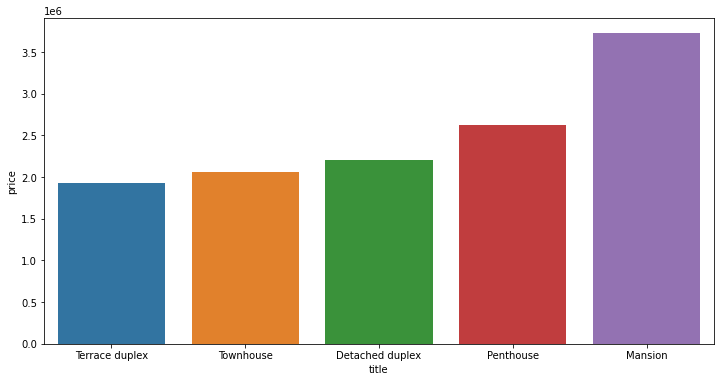

In [37]:
#What are the top 5 most expensive house types in the dataset?
title = df.groupby('title').mean()[['price']].sort_values('price').tail().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='title', y='price', data=title)

**Insight**

Mansion is the most expensive house type in the dataset

<AxesSubplot:>

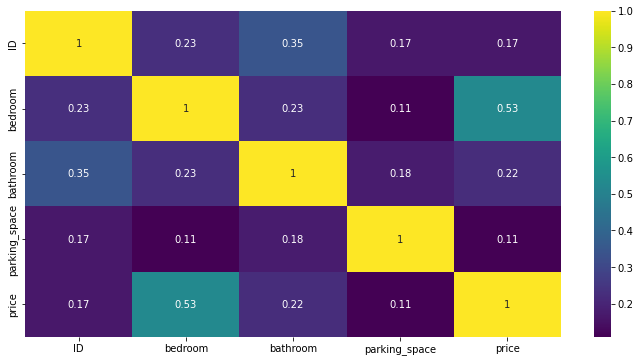

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

**Insight**

The number of bedrooms and bathrooms seem to be the most correlated of the numerical features

<AxesSubplot:xlabel='title', ylabel='price'>

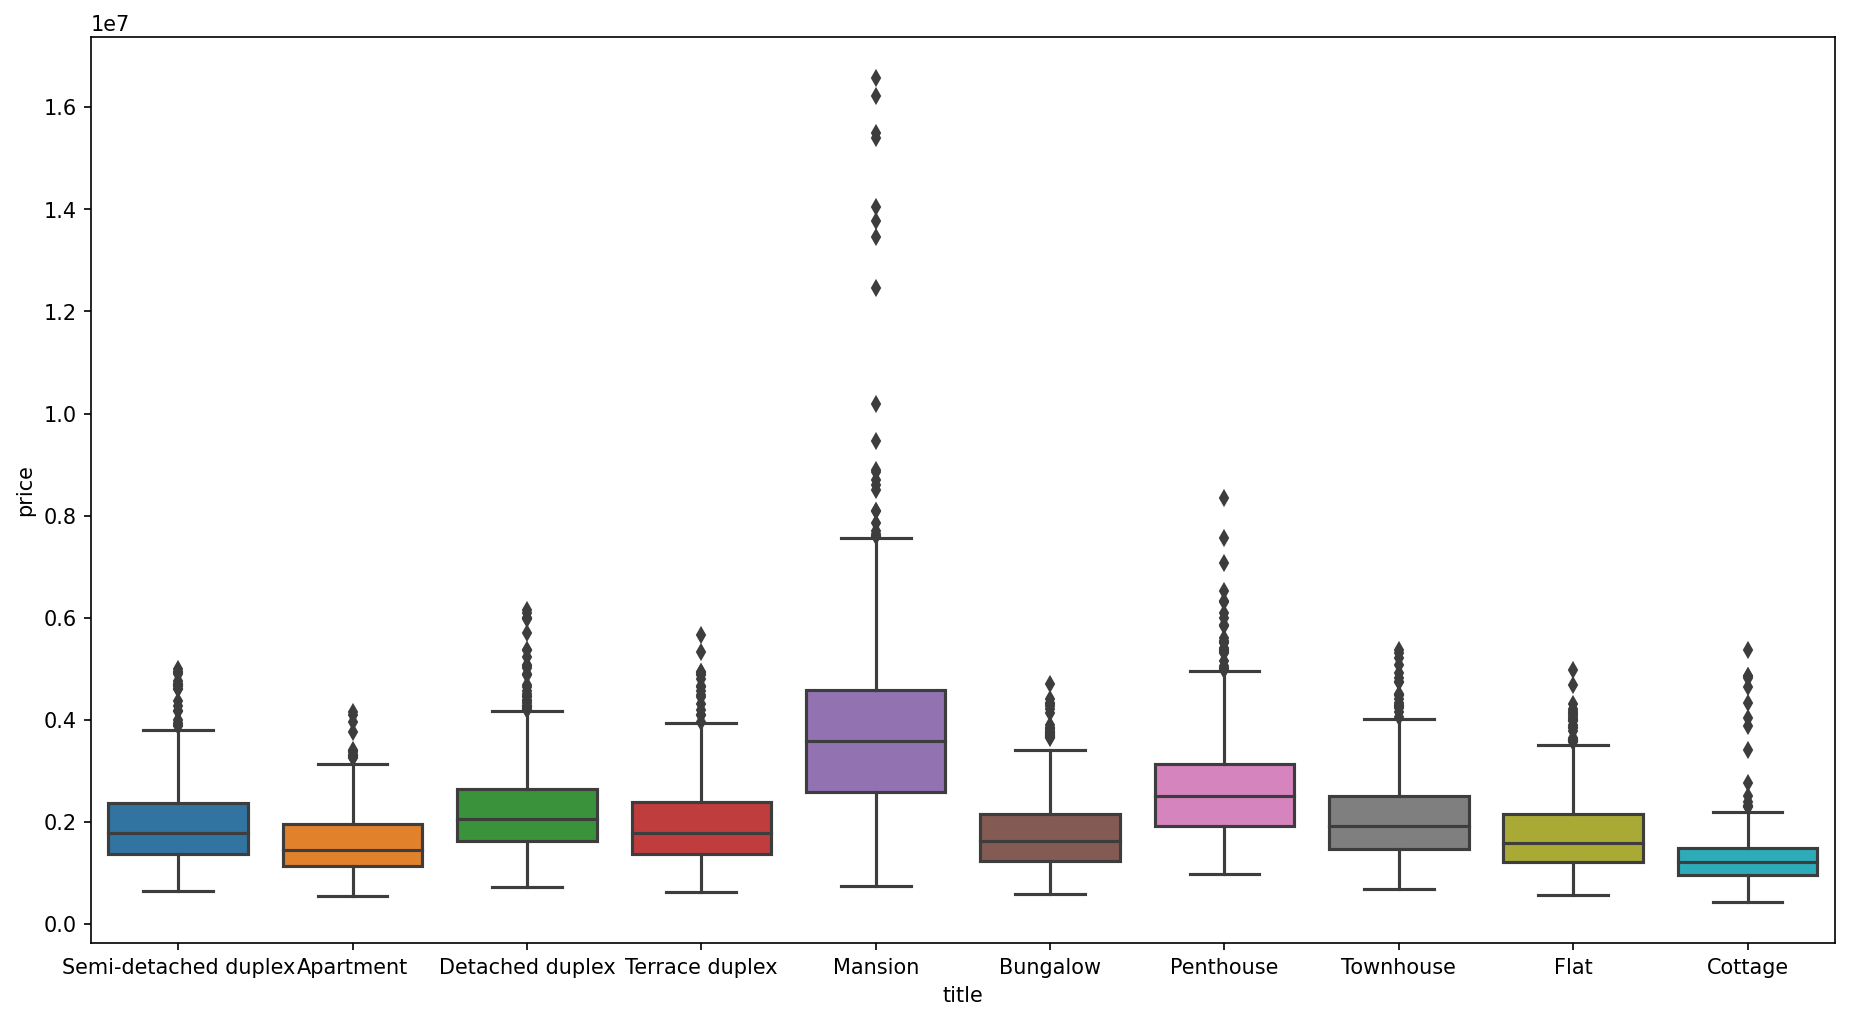

In [41]:
#How does the house price vary with different house types?
plt.figure(figsize=(15,8),dpi=150)
sns.boxplot(x='title', y='price' , data=df)

In [43]:
#What is the average number of bedrooms for each house type?
df.groupby('title').mean()[['bedroom']]

,bedroom
title,
Apartment,4.344219
Bungalow,4.402852
Cottage,2.905512
Detached duplex,4.327840
Flat,4.378877
Mansion,4.333929
Penthouse,4.342982
Semi-detached duplex,4.414903
Terrace duplex,4.340639


In [45]:
data = pd.concat([df,test],ignore_index=False)

In [48]:
data = data.drop('ID', axis=1)

In [49]:
data.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [50]:
house_type_ranks = {
"Apartment":1,
"Flat":2,
"Cottage":3,
"Semi-detached duplex":4,
"Terrace duplex":5,
"Bungalow":6,
"Townhouse":7,
"Detached duplex":8,
"Penthouse":9,
"Mansion":10,
}



# Map the house types to numerical values based on size ranking
data['title'] = data['title'].map(house_type_ranks)



In [51]:
data.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,4.0,2.0,2.0,1.0,1149999.565
1,Ondo,1.0,NaN,2.0,4.0,1672416.689
2,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,Anambra,8.0,5.0,2.0,4.0,2410306.756
4,Kogi,5.0,NaN,5.0,6.0,2600700.898


In [52]:
# Create the 'Total Rooms' feature
data['Total_Rooms'] = data['bedroom'] + data['bathroom']


# Create the 'Bathroom-to-Bedroom Ratio' feature
data['Bathroom_to_Bedroom_Ratio'] = data['bathroom'] / data['bedroom']


data.head()

,loc,title,bedroom,bathroom,parking_space,price,Total_Rooms,Bathroom_to_Bedroom_Ratio
0,Katsina,4.0,2.0,2.0,1.0,1149999.565,4.0,1.000000
1,Ondo,1.0,NaN,2.0,4.0,1672416.689,NaN,NaN
2,Ekiti,NaN,7.0,5.0,NaN,3364799.814,12.0,0.714286
3,Anambra,8.0,5.0,2.0,4.0,2410306.756,7.0,0.400000
4,Kogi,5.0,NaN,5.0,6.0,2600700.898,NaN,NaN


In [62]:
encoder = ce.TargetEncoder(return_df=True)

In [63]:
data = encoder.fit_transform(data, data['price'])

In [64]:
data

,loc,title,bedroom,bathroom,parking_space,price,Total_Rooms,Bathroom_to_Bedroom_Ratio
0,1.947589e+06,4.0,2.0,2.0,1.0,1149999.565,4.0,1.000000
1,2.277494e+06,1.0,NaN,2.0,4.0,1672416.689,NaN,NaN
2,2.109220e+06,NaN,7.0,5.0,NaN,3364799.814,12.0,0.714286
3,2.337230e+06,8.0,5.0,2.0,4.0,2410306.756,7.0,0.400000
4,1.763416e+06,5.0,NaN,5.0,6.0,2600700.898,NaN,NaN
...,...,...,...,...,...,...,...,...
5995,2.109220e+06,2.0,4.0,5.0,2.0,NaN,9.0,1.250000
5996,1.905287e+06,5.0,5.0,7.0,1.0,NaN,12.0,1.400000
5997,2.293159e+06,7.0,4.0,1.0,4.0,NaN,5.0,0.250000
5998,1.772961e+06,2.0,3.0,7.0,5.0,NaN,10.0,2.333333


In [65]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Assuming you have your dataframe 'data' and want to perform regression imputation on columns with missing values

# Create a copy of the dataframe to avoid modifying the original data
impute_data = data.copy()

# Get the columns with missing values
columns_with_missing = impute_data.columns[impute_data.isnull().any()]

# Perform regression imputation for each column with missing values
for target in columns_with_missing:
    # Select features for regression imputation (consider using other relevant features if available)
    features = impute_data.columns.difference([target])
    
    # Split the data into known (non-missing) and missing values for the target feature
    known_data = impute_data.loc[impute_data[target].notnull(), features.to_list() + [target]]
    missing_data = impute_data.loc[impute_data[target].isnull(), features.to_list()]

    # Separate the target and features for known and missing data
    X_known = known_data[features]
    y_known = known_data[target]
    X_missing = missing_data[features]

    # Create a regression model
    regression_model = LGBMRegressor()

    # Fit the regression model on the known data
    regression_model.fit(X_known, y_known)

    # Predict the missing values using the regression model
    imputed_values = regression_model.predict(X_missing)

    # Fill the missing values in the original dataframe
    impute_data.loc[impute_data[target].isnull(), target] = imputed_values

# Print the updated dataframe with filled missing values
impute_data


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 18278, number of used features: 7
[LightGBM] [Info] Start training from score 5.666594
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 18201, number of used features: 7
[LightGBM] [Info] Start training from score 4.315312
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tot

,loc,title,bedroom,bathroom,parking_space,price,Total_Rooms,Bathroom_to_Bedroom_Ratio
0,1.947589e+06,4.0000,2.000000,2.0,1.000000,1.150000e+06,4.000000,1.000000
1,2.277494e+06,1.0000,4.278082,2.0,4.000000,1.672417e+06,5.174911,0.520471
2,2.109220e+06,8.2512,7.000000,5.0,4.005657,3.364800e+06,12.000000,0.714286
3,2.337230e+06,8.0000,5.000000,2.0,4.000000,2.410307e+06,7.000000,0.400000
4,1.763416e+06,5.0000,8.623348,5.0,6.000000,2.600701e+06,13.978423,0.555636
...,...,...,...,...,...,...,...,...
5995,2.109220e+06,2.0000,4.000000,5.0,2.000000,1.656829e+06,9.000000,1.250000
5996,1.905287e+06,5.0000,5.000000,7.0,1.000000,1.863149e+06,12.000000,1.400000
5997,2.293159e+06,7.0000,4.000000,1.0,4.000000,2.044760e+06,5.000000,0.250000
5998,1.772961e+06,2.0000,3.000000,7.0,5.000000,1.331210e+06,10.000000,2.333333


In [66]:
impute_data.isnull().sum()

loc                          0
title                        0
bedroom                      0
bathroom                     0
parking_space                0
price                        0
Total_Rooms                  0
Bathroom_to_Bedroom_Ratio    0
dtype: int64

In [67]:
data = impute_data.copy()

In [70]:
data[df.shape[0]:]


,loc,title,bedroom,bathroom,parking_space,price,Total_Rooms,Bathroom_to_Bedroom_Ratio
0,2.081931e+06,9.0,4.0,1.0,2.0,2.357633e+06,5.0,0.250000
1,1.905287e+06,1.0,2.0,2.0,4.0,1.024562e+06,4.0,1.000000
2,1.905287e+06,6.0,2.0,7.0,2.0,1.253566e+06,9.0,3.500000
3,4.210546e+06,10.0,9.0,5.0,2.0,8.494182e+06,14.0,0.555556
4,1.860851e+06,4.0,5.0,6.0,1.0,1.828081e+06,11.0,1.200000
...,...,...,...,...,...,...,...,...
5995,2.109220e+06,2.0,4.0,5.0,2.0,1.656829e+06,9.0,1.250000
5996,1.905287e+06,5.0,5.0,7.0,1.0,1.863149e+06,12.0,1.400000
5997,2.293159e+06,7.0,4.0,1.0,4.0,2.044760e+06,5.0,0.250000
5998,1.772961e+06,2.0,3.0,7.0,5.0,1.331210e+06,10.0,2.333333


In [73]:
train = data[:df.shape[0]]
y = train.price
test = data[df.shape[0]:]

In [78]:
y

0        1149999.565
1        1672416.689
2        3364799.814
3        2410306.756
4        2600700.898
            ...     
13995    2367927.861
13996    2228516.471
13997    2406812.693
13998    3348918.718
13999    2858516.890
Name: price, Length: 14000, dtype: float64

In [77]:
test.drop('price', axis=1, inplace=True)

In [79]:
X = train.drop('price', axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [85]:
#cross val score
def score(model):
    cv = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
    
    return np.sqrt(np.mean(-cv))

In [86]:
rf_cv = RandomForestRegressor()
score(rf_cv)

456142.1222426775

In [114]:
catboost =CatBoostRegressor(learning_rate=0.102,max_depth=5,min_child_samples=3,random_state=0,silent=True,
                           n_estimators=312)
score(catboost)

414591.2659374284

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
def report(model):
    model_name = model.fit(X_train,y_train)
    pred_model = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred_model))
    
    return rmse

In [90]:
report(rf_cv)

451122.8640492227

In [115]:
report(catboost)

415472.4400116604

In [122]:
xgb = XGBRegressor(learning_rate= 0.102, max_depth=3)

In [123]:
report(xgb)

417185.6669017697

In [111]:
lgbm = LGBMRegressor(learning_rate= 0.102, max_depth=3, n_estimators=312)

In [112]:
report(lgbm)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1235
[LightGBM] [Info] Number of data points in the train set: 9800, number of used features: 7
[LightGBM] [Info] Start training from score 2134970.805883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

410250.05774169526

In [98]:
def make_submission(model, filename):
    sub_copy = sub.copy()
    prediction = model.predict(test)
    sub_copy['price'] = prediction
    sub_copy.to_csv(filename, index=False)

In [104]:
make_submission(catboost,'A12.csv')

In [124]:
make_submission(xgb,'xgb2.csv')

In [113]:
make_submission(lgbm,'lgbm2.csv')

In [125]:
xgb.feature_importances_

array([0.18148068, 0.2652532 , 0.38319945, 0.00842201, 0.01292426,
       0.13518342, 0.01353693], dtype=float32)

In [147]:
feat = pd.DataFrame(xgb.feature_importances_, columns=['importance'])

In [148]:
feat['column'] = X.columns

In [149]:
feat

,importance,column
0,0.181481,loc
1,0.265253,title
2,0.383199,bedroom
3,0.008422,bathroom
4,0.012924,parking_space
5,0.135183,Total_Rooms
6,0.013537,Bathroom_to_Bedroom_Ratio


<AxesSubplot:xlabel='importance', ylabel='column'>

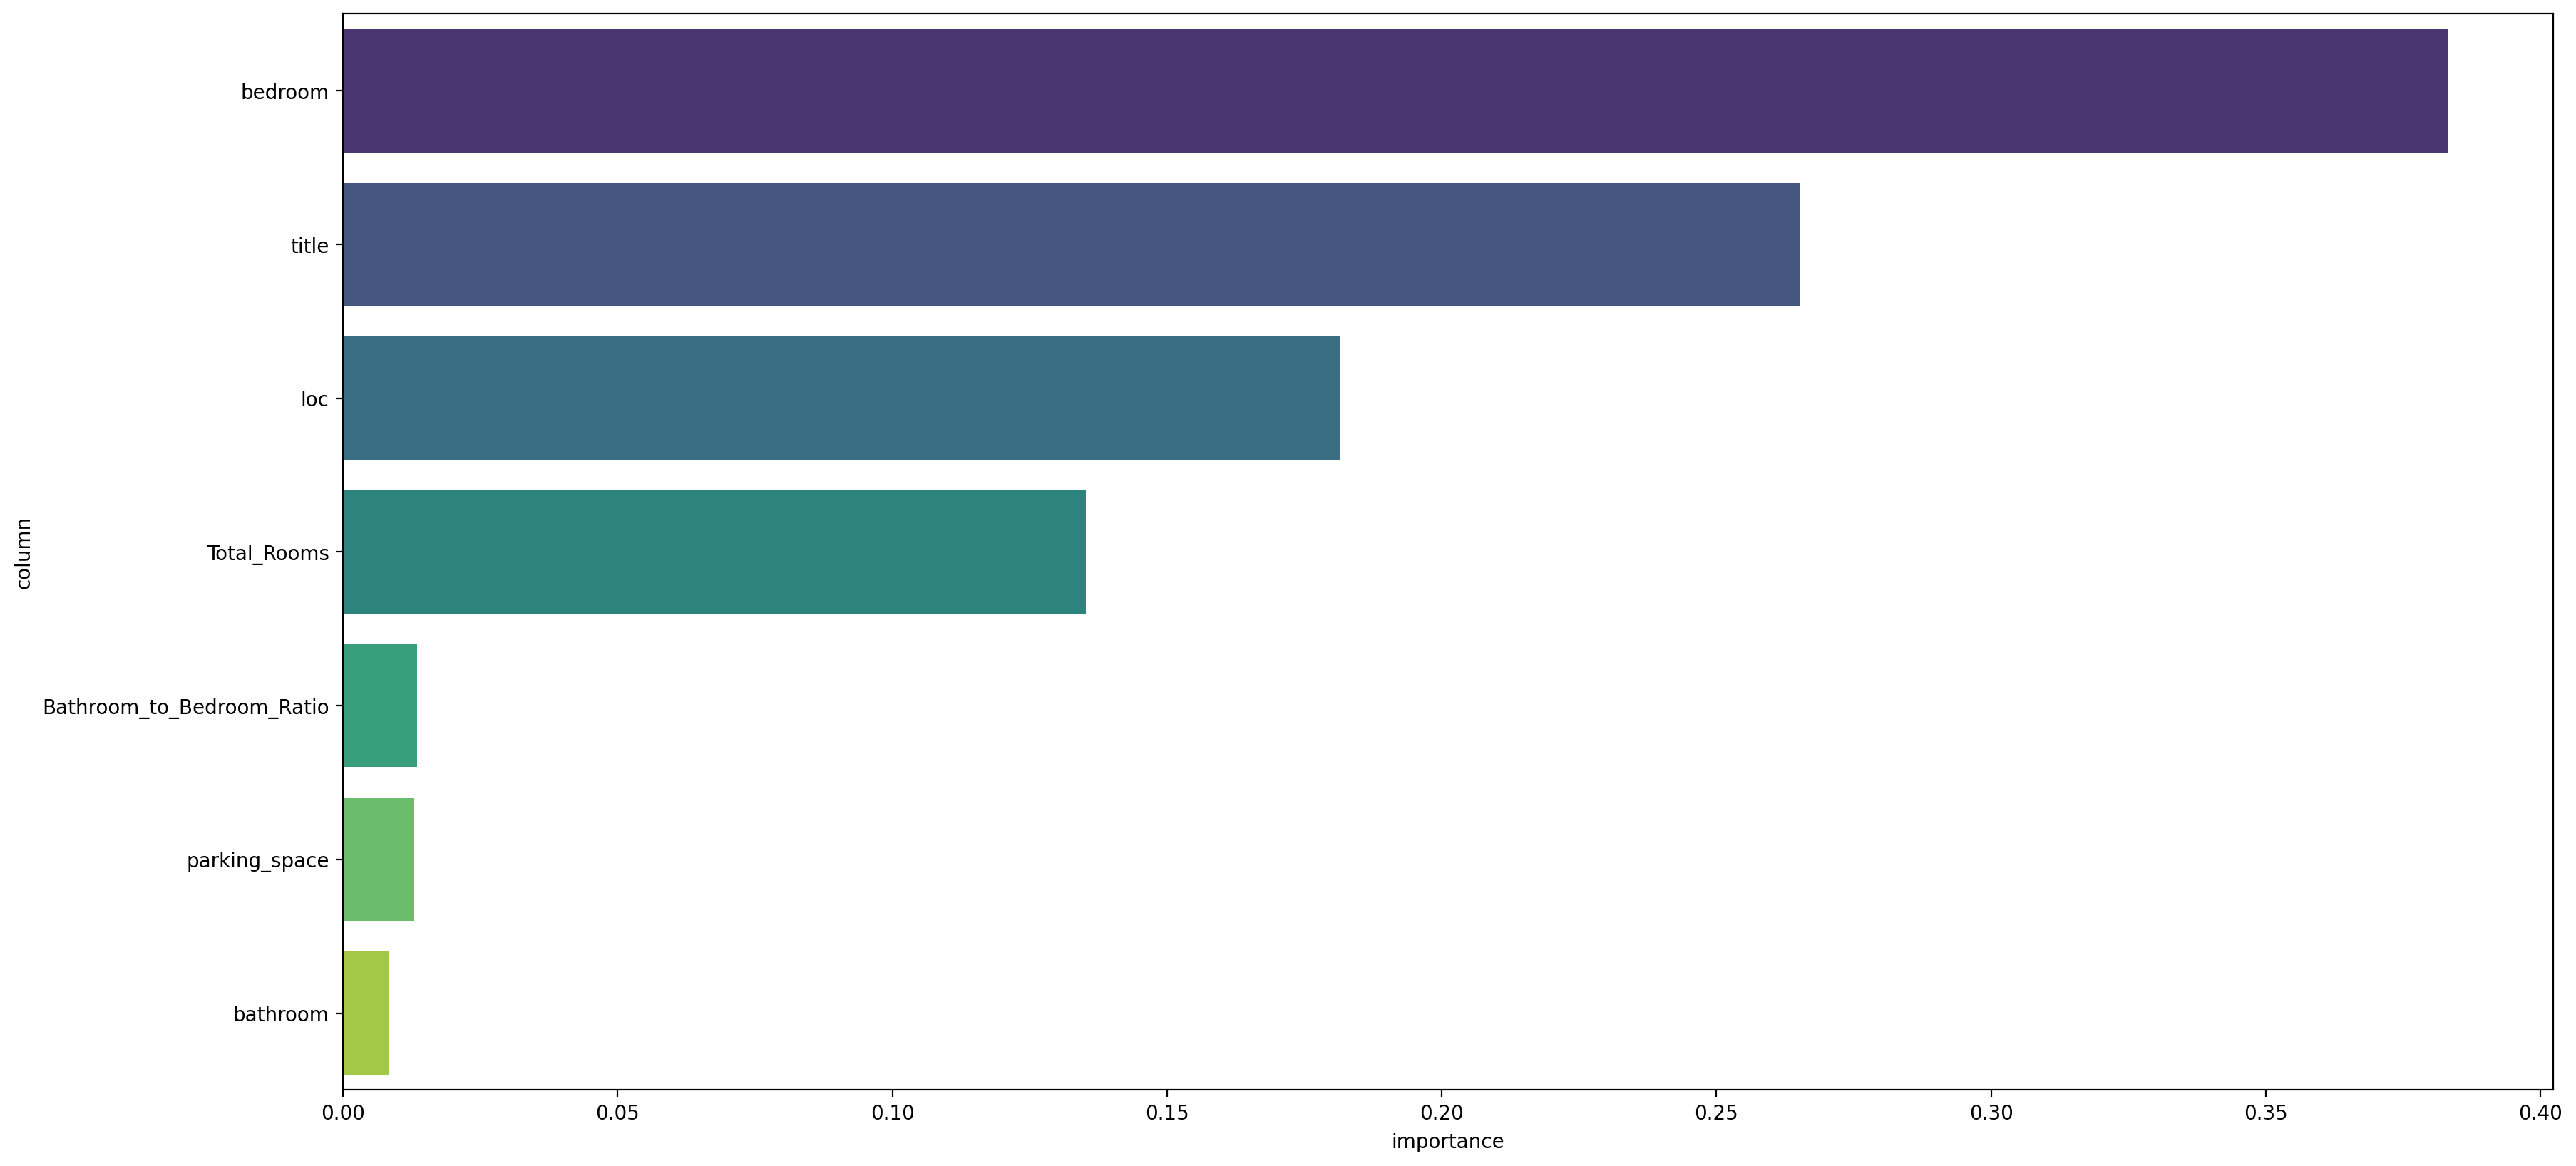

In [153]:
plt.figure(figsize=(20,10),dpi=200)
sns.barplot(y='column',x='importance', data=feat.sort_values('importance',ascending=False),palette='viridis')